# Linear Regression- Bike Sharing Assignment

## 1. Problem Statement
BoomBikes, a US bike-sharing company, suffered heavy losses due to Covid-19. To recover, they aim to analyze post-lockdown bike demand and optimize services. They've hired a consulting firm to identify key factors affecting rentals. Using a large dataset on daily demand, weather, and user behavior, they seek insights to stay ahead of competitors and maximize profits.
## 2. Business Goal
BoomBikes wants to model bike demand using various factors to understand demand patterns. This will help management adjust business strategies, optimize services, and meet customer expectations. The model will also provide insights into demand dynamics for expansion into new markets..

In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading and understanding data

In [5]:
# read the data
data=pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
data.shape

(730, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# No missing values

In [9]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
numvar=['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']
catvar=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']

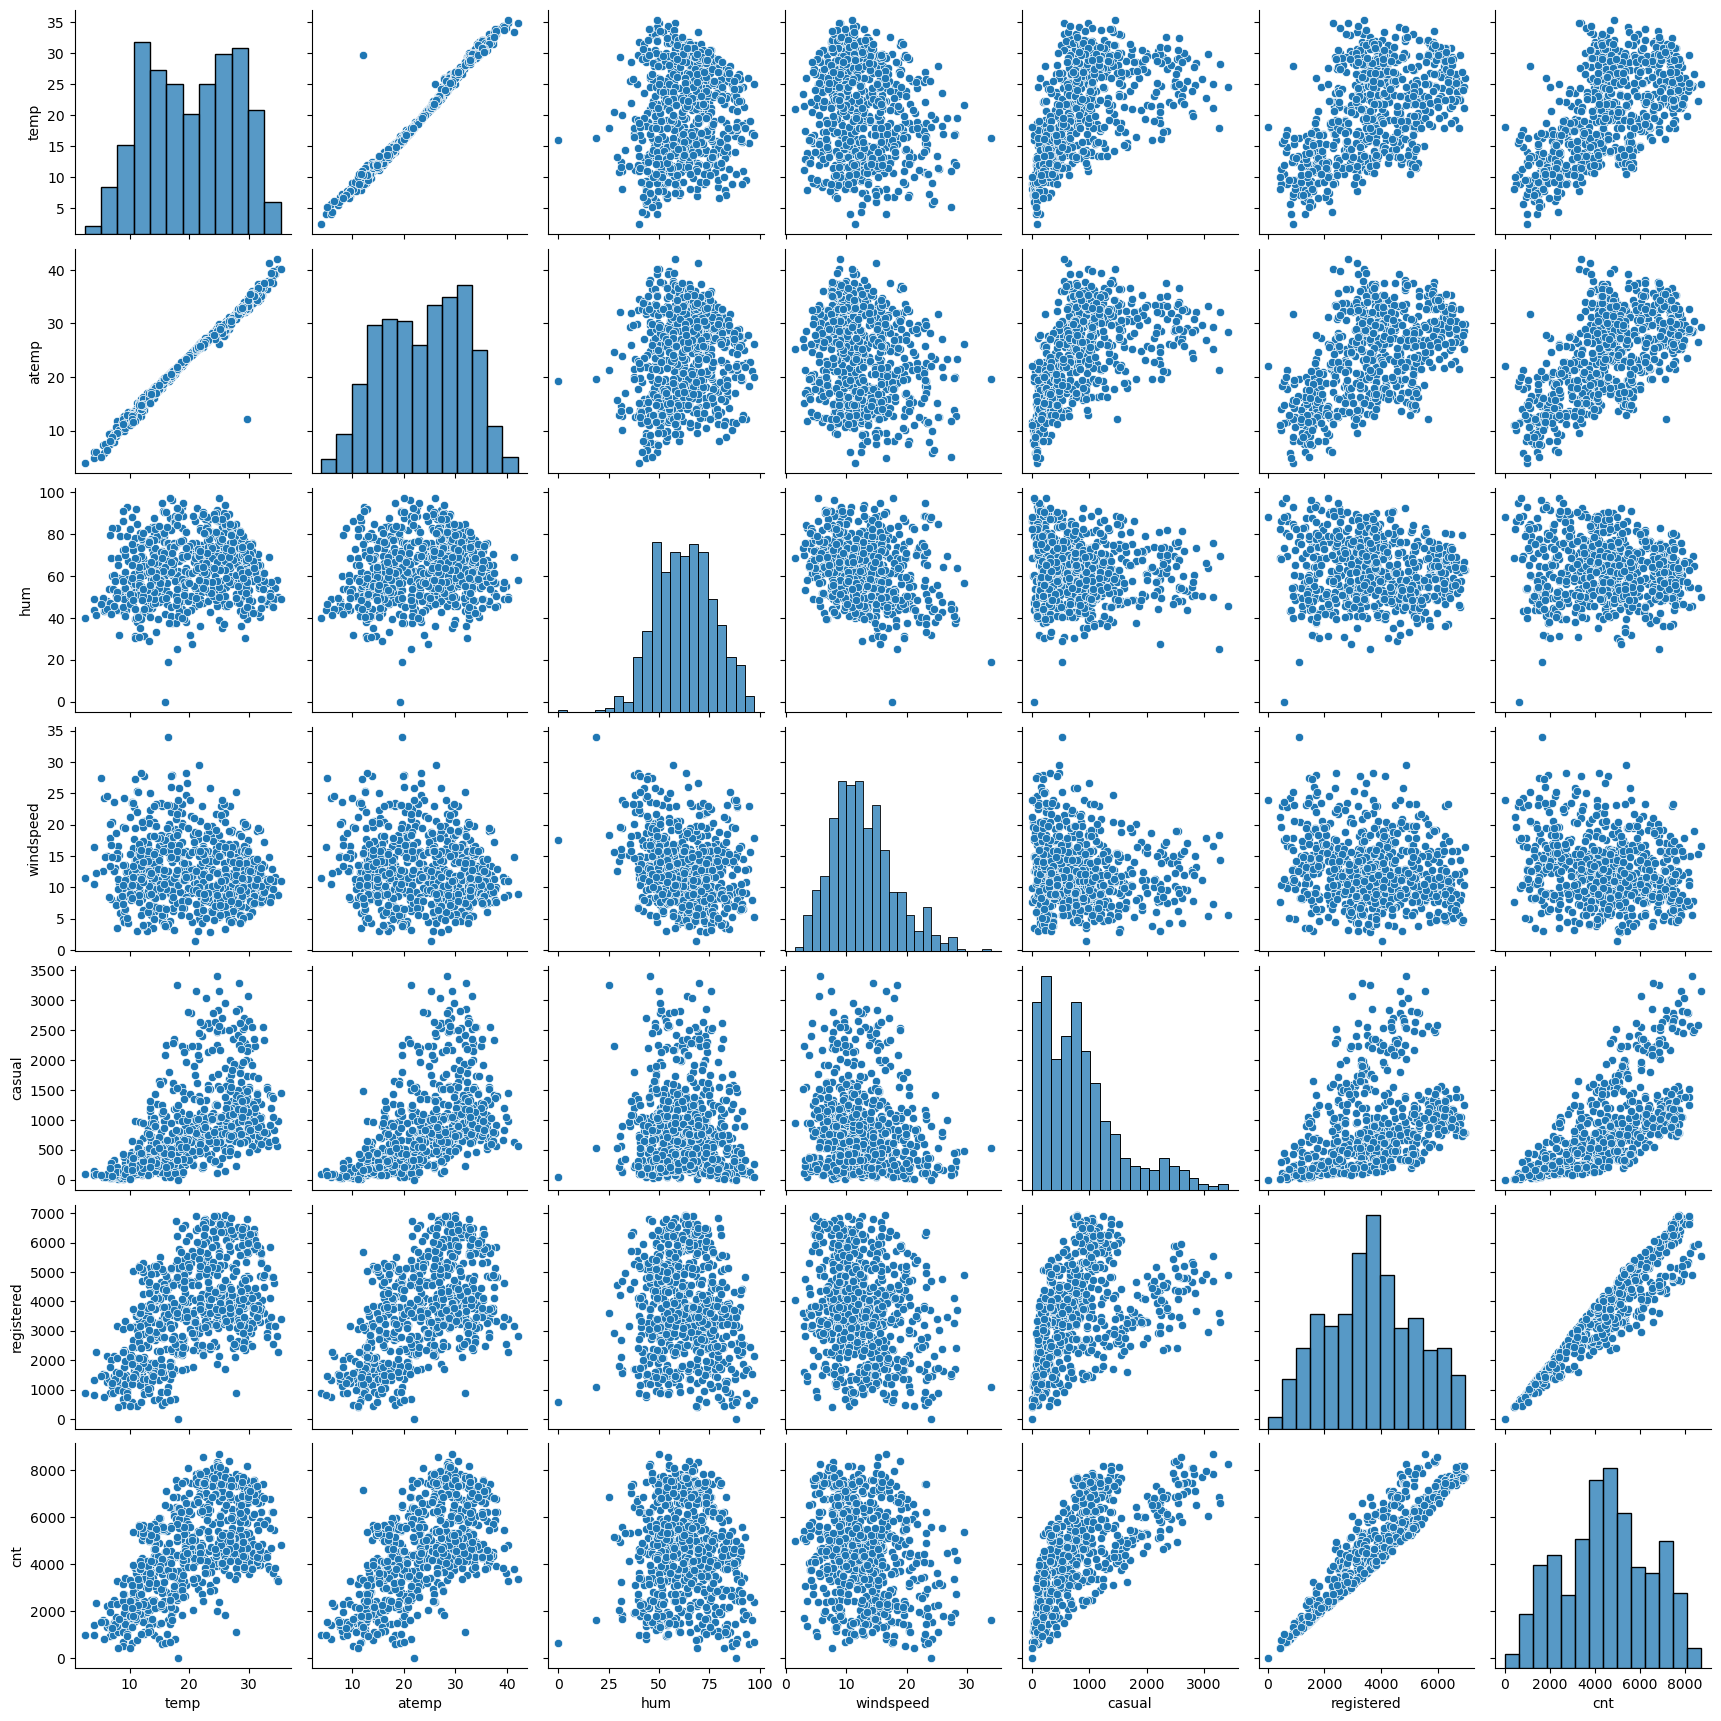

In [12]:
# Visualising the numerical variables
sns.pairplot(data[numvar])
plt.show()

In [13]:
# Calculating how many days have passed since January 1, 2018, for each date in dteday
data['days_old'] = (pd.to_datetime(data['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [14]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [15]:
# Dropping columns because they are not needed for modeling bike demand
data.drop(['instant'], axis = 1, inplace = True)
data.drop(['dteday'], axis = 1, inplace = True)
data.drop(['casual'], axis = 1, inplace = True)
data.drop(['registered'], axis = 1, inplace = True)

In [16]:
# Converting variables like 'weathersit' and 'season' values into categorical string values before proceeding with model building
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
data.mnth = data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
data.weekday = data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [17]:
numvar=['temp', 'atemp', 'hum', 'windspeed', 'cnt',"days_old"]

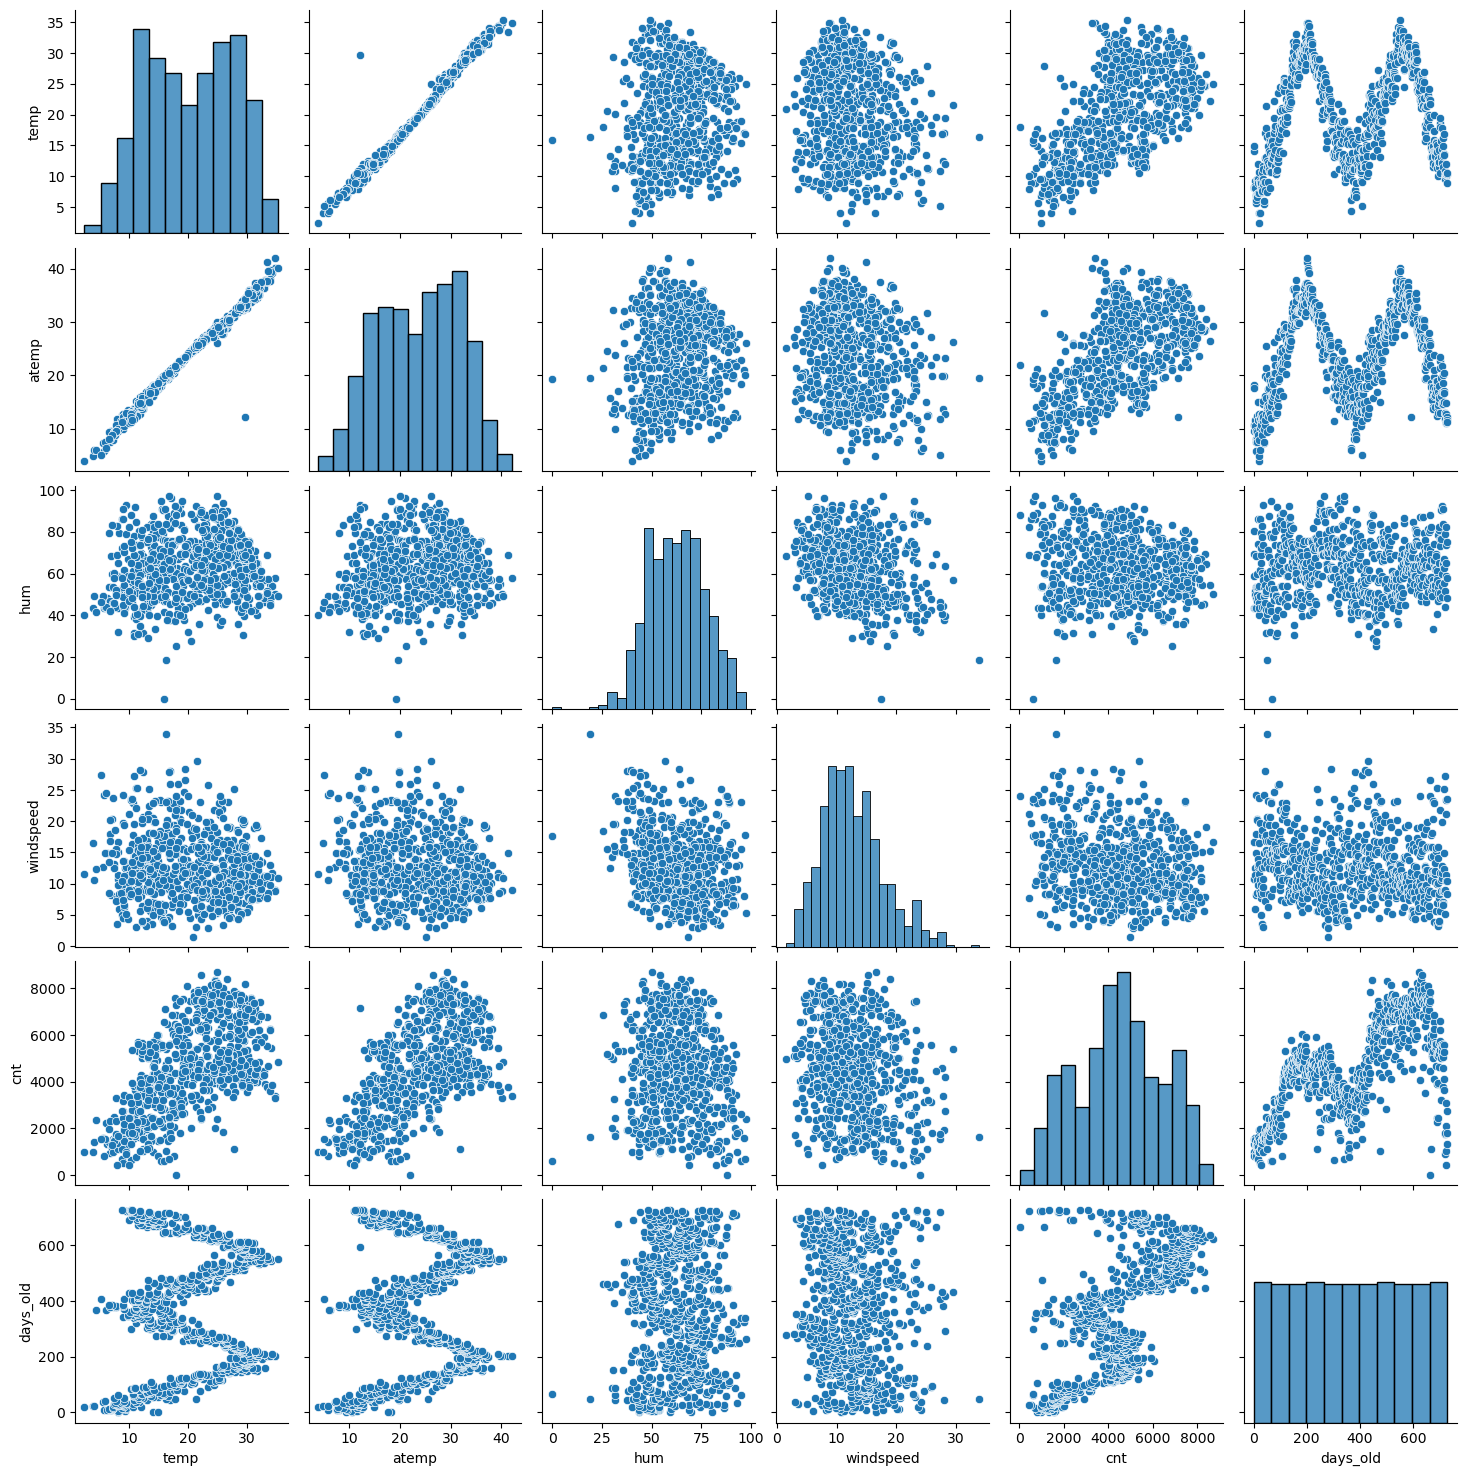

In [18]:
sns.pairplot(data[numvar])
plt.show()

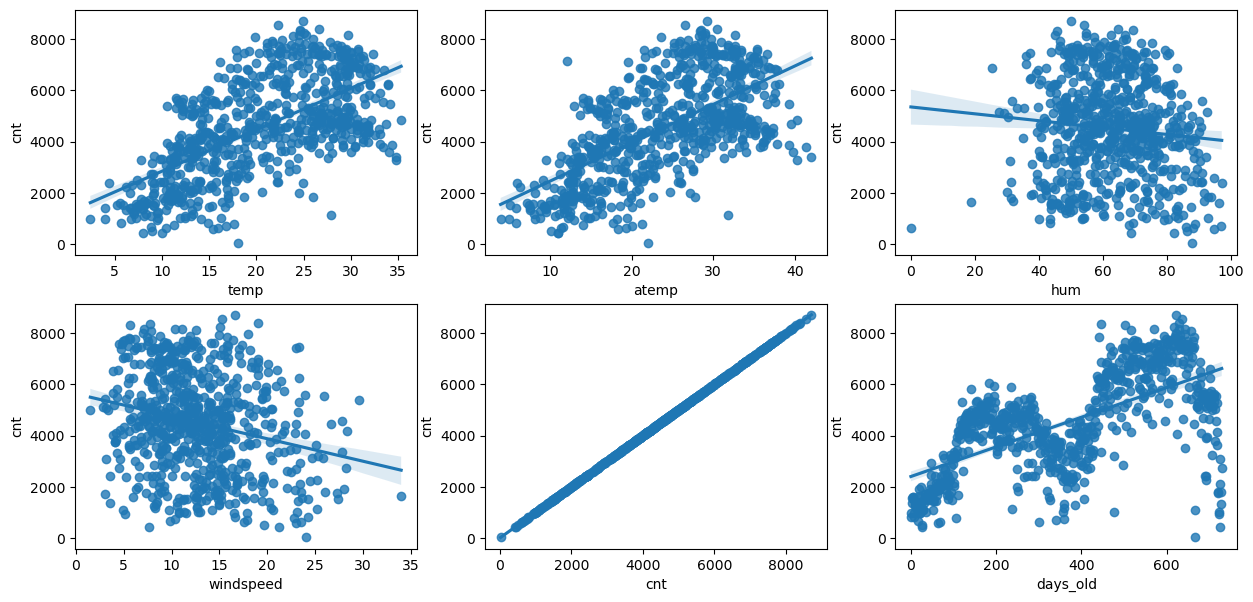

In [19]:
plt.figure(figsize=(15,7))

plt.subplot(2,3,1)
sns.regplot(x="temp", y="cnt", data=data)

plt.subplot(2,3,2)
sns.regplot(x="atemp", y="cnt", data=data)

plt.subplot(2,3,3)
sns.regplot(x="hum", y="cnt", data=data)

plt.subplot(2,3,4)
sns.regplot(x="windspeed", y="cnt", data=data)

plt.subplot(2,3,5)
sns.regplot(x="cnt", y="cnt", data=data)

plt.subplot(2,3,6)
sns.regplot(x="days_old", y="cnt", data=data)

plt.show()

In [20]:
correlation=data[numvar].corr()

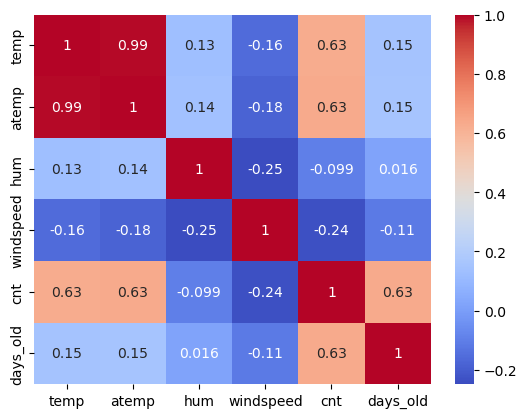

In [21]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

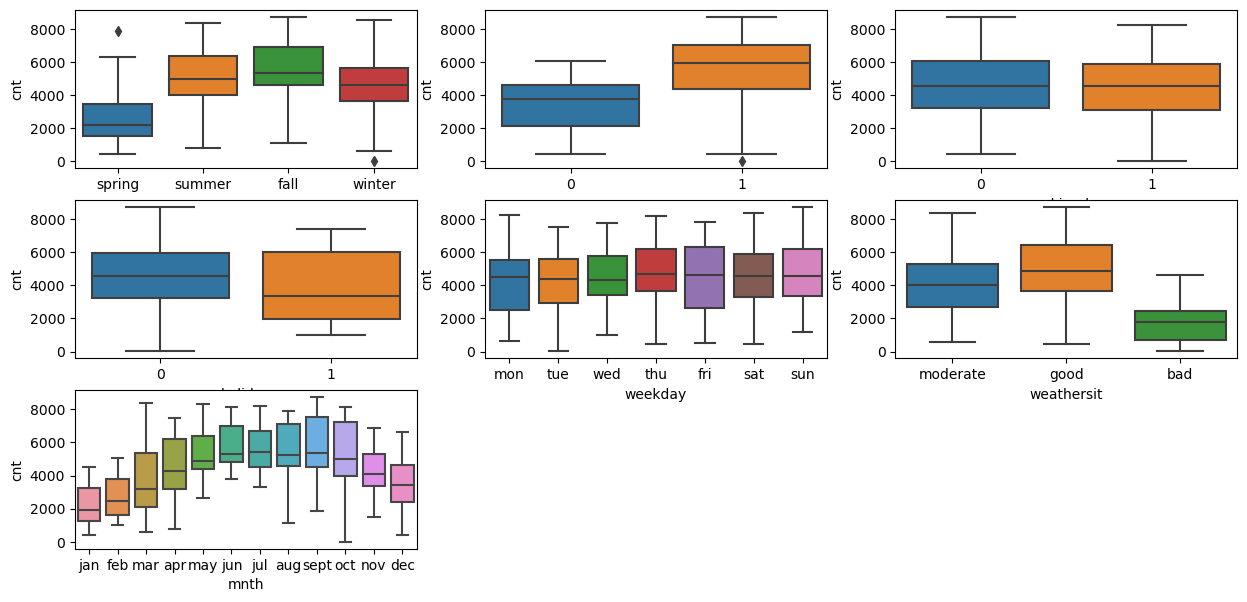

In [22]:
plt.figure(figsize=(15,7))

plt.subplot(3,3,1)
sns.boxplot(x="season", y="cnt", data=data)

plt.subplot(3,3,2)
sns.boxplot(x="yr", y="cnt", data=data)

plt.subplot(3,3,3)
sns.boxplot(x="workingday", y="cnt", data=data)

plt.subplot(3,3,4)
sns.boxplot(x="holiday", y="cnt", data=data)

plt.subplot(3,3,5)
sns.boxplot(x="weekday", y="cnt", data=data)

plt.subplot(3,3,6)
sns.boxplot(x="weathersit", y="cnt", data=data)

plt.subplot(3,3,7)
sns.boxplot(x="mnth", y="cnt", data=data)

plt.show()

In [23]:
# Getting dummy variables
dum1 = pd.get_dummies(data["season"],drop_first=True)
dum2 = pd.get_dummies(data["mnth"],drop_first=True)
dum3 = pd.get_dummies(data["weekday"],drop_first=True)
dum4 = pd.get_dummies(data["weathersit"])

In [24]:
dum1=dum1.astype(int)
dum2=dum2.astype(int)
dum3=dum3.astype(int)
dum4=dum4.astype(int)

In [25]:
data=pd.concat([data,dum1], axis=1)
data=pd.concat([data,dum2], axis=1)
data=pd.concat([data,dum3], axis=1)
data=pd.concat([data,dum4], axis=1)
data


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,1,0
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,0,1,0
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,moderate,10.420847,11.33210,65.2917,...,0,0,0,0,0,0,0,0,0,1
726,spring,1,dec,0,sat,0,moderate,10.386653,12.75230,59.0000,...,0,0,1,0,0,0,0,0,0,1
727,spring,1,dec,0,sun,0,moderate,10.386653,12.12000,75.2917,...,0,0,0,1,0,0,0,0,0,1
728,spring,1,dec,0,mon,1,good,10.489153,11.58500,48.3333,...,0,1,0,0,0,0,0,0,1,0


In [26]:
data.drop(['season'], axis = 1, inplace = True)
data.drop(['mnth'], axis = 1, inplace = True)
data.drop(['weekday'], axis = 1, inplace = True)
data.drop(['weathersit'], axis = 1, inplace = True)

In [27]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'bad', 'good', 'moderate'],
      dtype='object')

In [28]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Splitting into train and test

In [30]:
y=data.pop('cnt')
X=data

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=100)

In [32]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [33]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(510, 31)
(510,)
(220, 31)
(220,)


In [35]:
# Scaling
# 1. Instantiate the object
scaler=MinMaxScaler()

# Create list of numerical variables
numvar1=['temp', 'atemp', 'hum', 'windspeed',"days_old"]

# 2. Fit on data
X_train[numvar1]=scaler.fit_transform(X_train[numvar1])

In [36]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.152473,0,1,...,0,0,0,1,0,0,0,0,0,1


### Model Bulding

In [38]:
X_train_sm=sm.add_constant(X_train['yr'])
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const    3314.557769
yr       2305.395899
dtype: float64

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.3
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.95e-49
Time:                        23:33:25   Log-Likelihood:                -4477.1
No. Observations:                 510   AIC:                             8958.
Df Residuals:                     508   BIC:                             8967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3314.5578     99.380     33.352      0.000    3119.311    3509.804
yr          2305.3959    139.455     16.531      0.000    2031.416    2579.376
==============================================================================
Omnibus:                       27.322   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.203
Skew:                          -0.560   Prob(JB):                     4.56e-07
Kurtosis:                       2.654   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# add another variable

X_train_sm=X_train[['yr', 'days_old']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const       2326.438128
yr           368.018048
days_old    3904.528811
dtype: float64

In [41]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     195.1
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           1.48e-63
Time:                        23:33:25   Log-Likelihood:                -4441.4
No. Observations:                 510   AIC:                             8889.
Df Residuals:                     507   BIC:                             8901.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2326.4381    146.265     15.906      0.000    2039.077    2613.799
yr           368.0180    257.126      1.431      0.153    -137.145     873.182
days_old    3904.5288    446.927      8.736      0.000    3026.472    4782.586
==============================================================================
Omnibus:                       36.080   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.262
Skew:                          -0.649   Prob(JB):                     6.65e-10
Kurtosis:                       3.553   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# add another variable
X_train_sm=X_train[['yr', 'days_old', 'temp']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        340.647285
yr          1011.026469
days_old    2142.442480
temp        4743.221584
dtype: float64

In [44]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     424.5
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.03e-137
Time:                        23:33:25   Log-Likelihood:                -4266.2
No. Observations:                 510   AIC:                             8540.
Df Residuals:                     506   BIC:                             8557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        340.6473    136.672      2.492      0.013      72.132     609.163
yr          1011.0265    184.827      5.470      0.000     647.905    1374.148
days_old    2142.4425    326.989      6.552      0.000    1500.019    2784.866
temp        4743.2216    212.210     22.352      0.000    4326.301    5160.142
==============================================================================
Omnibus:                       76.752   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.822
Skew:                          -0.845   Prob(JB):                     3.96e-34
Kurtosis:                       5.093   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
X_train_sm=X_train[['yr', 'days_old', 'temp', 'windspeed']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const         960.826484
yr           1146.022234
days_old     1886.464398
temp         4575.066563
windspeed   -1461.838994
dtype: float64

In [46]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     342.9
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          2.08e-142
Time:                        23:33:25   Log-Likelihood:                -4252.1
No. Observations:                 510   AIC:                             8514.
Df Residuals:                     505   BIC:                             8535.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        960.8265    176.434      5.446      0.000     614.191    1307.462
yr          1146.0222    181.730      6.306      0.000     788.983    1503.062
days_old    1886.4644    321.971      5.859      0.000    1253.898    2519.031
temp        4575.0666    209.010     21.889      0.000    4164.431    4985.702
windspeed  -1461.8390    273.040     -5.354      0.000   -1998.272    -925.406
==============================================================================
Omnibus:                       56.005   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.631
Skew:                          -0.699   Prob(JB):                     2.83e-21
Kurtosis:                       4.581   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
X_train_sm=X_train[['yr', 'days_old', 'temp', 'windspeed', 'hum']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        2566.832880
yr            877.478315
days_old     2293.107423
temp         4708.933367
windspeed   -1926.891511
hum         -2456.221000
dtype: float64

In [48]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     320.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          6.44e-154
Time:                        23:33:25   Log-Likelihood:                -4222.2
No. Observations:                 510   AIC:                             8456.
Df Residuals:                     504   BIC:                             8482.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2566.8329    262.458      9.780      0.000    2051.187    3082.479
yr           877.4783    174.874      5.018      0.000     533.906    1221.050
days_old    2293.1074    308.250      7.439      0.000    1687.494    2898.720
temp        4708.9334    198.029     23.779      0.000    4319.870    5097.997
windspeed  -1926.8915    264.358     -7.289      0.000   -2446.271   -1407.512
hum        -2456.2210    310.222     -7.918      0.000   -3065.708   -1846.734
==============================================================================
Omnibus:                       53.921   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.637
Skew:                          -0.667   Prob(JB):                     4.65e-21
Kurtosis:                       4.621   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X_train_sm =sm.add_constant(X_train)
lr=sm.OLS(y_train, X_train)
lr_model=lr.fit()
lr_model.params

yr            2492.357930
holiday      -1168.270827
workingday    -523.281359
temp          3383.533436
atemp          454.632638
hum          -1364.381924
windspeed    -1564.696217
days_old      -961.928021
spring        -360.465534
summer         399.027647
winter         968.779399
aug            415.619851
dec            -58.935640
feb           -398.436778
jan           -669.721686
jul           -116.174164
jun            166.467332
mar            -28.545194
may            260.560603
nov            -54.076651
oct            301.415782
sept           998.525504
mon           -215.121304
sat           -481.427796
sun           -430.943741
thu             37.149361
tue           -227.125970
wed            -88.238264
bad           1386.901218
good          3556.288676
moderate      3050.731200
dtype: float64

In [50]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     90.67
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.15e-176
Time:                        23:33:25   Log-Likelihood:                -4102.7
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     479   BIC:                             8399.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr          2492.3579   1441.179      1.729      0.084    -339.455    5324.171
holiday    -1168.2708    569.979     -2.050      0.041   -2288.239     -48.302
workingday  -523.2814    619.569     -0.845      0.399   -1740.691     694.128
temp        3383.5334   1249.345      2.708      0.007     928.659    5838.408
atemp        454.6326   1214.579      0.374      0.708   -1931.929    2841.195
hum        -1364.3819    339.904     -4.014      0.000   -2032.269    -696.495
windspeed  -1564.6962    232.367     -6.734      0.000   -2021.280   -1108.112
days_old    -961.9280   2869.084     -0.335      0.738   -6599.474    4675.617
spring      -360.4655    264.074     -1.365      0.173    -879.351     158.420
summer       399.0276    230.053      1.735      0.083     -53.011     851.066
winter       968.7794    246.378      3.932      0.000     484.663    1452.895
aug          415.6199    570.251      0.729      0.466    -704.882    1536.122
dec          -58.9356   1019.500     -0.058      0.954   -2062.181    1944.310
feb         -398.4368    364.924     -1.092      0.275   -1115.486     318.613
jan         -669.7217    448.718     -1.493      0.136   -1551.421     211.978
jul         -116.1742    476.613     -0.244      0.808   -1052.685     820.337
jun          166.4673    328.970      0.506      0.613    -479.935     812.870
mar          -28.5452    243.196     -0.117      0.907    -506.408     449.318
may          260.5606    218.447      1.193      0.234    -168.672     689.793
nov          -54.0767    921.132     -0.059      0.953   -1864.035    1755.882
oct          301.4158    813.101      0.371      0.711   -1296.269    1899.101
sept         998.5255    666.484      1.498      0.135    -311.068    2308.119
mon         -215.1213    127.135     -1.692      0.091    -464.933      34.690
sat         -481.4278    624.330     -0.771      0.441   -1708.192     745.336
sun         -430.9437    623.619     -0.691      0.490   -1656.312     794.424
thu           37.1494    130.462      0.285      0.776    -219.199     293.498
tue         -227.1260    127.979     -1.775      0.077    -478.596      24.344
wed          -88.2383    133.061     -0.663      0.508    -349.694     173.217
bad         1386.9012    875.155      1.585      0.114    -332.716    3106.519
good        3556.2887    839.134      4.238      0.000    1907.450    5205.127
moderate    3050.7312    844.644      3.612      0.000    1391.066    4710.396
==============================================================================
Omnibus:                       77.579   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.012
Skew:                          -0.758   Prob(JB):                     5.01e-45
Kurtosis:                       5.702   Cond. No.                         192.
==

In [51]:
# significance (p value) of variables, dropping one variable at a time
# We will also use VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
7,days_old,573.66
0,yr,437.31
29,good,371.03
30,moderate,207.40
12,dec,67.60
3,temp,66.94
2,workingday,66.34
19,nov,56.35
4,atemp,55.96
20,oct,43.00


In [53]:
X1= X_train.drop('dec', axis=1)

In [54]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const         2012.187595
yr            2572.008394
holiday      -1168.070030
workingday    -522.625685
temp          3388.285578
atemp          451.174669
hum          -1364.032100
windspeed    -1564.254075
days_old     -1120.672523
spring        -361.698413
summer         400.707047
winter         966.142079
aug            444.480939
feb           -407.460295
jan           -685.018655
jul            -94.262803
jun            180.960034
mar            -32.445962
may            267.602616
nov             -1.880541
oct            347.076595
sept          1034.548443
mon           -215.202883
sat           -480.681281
sun           -430.260723
thu             37.304914
tue           -227.030394
wed            -88.030460
bad           -607.074785
good          1562.613094
moderate      1056.649285
dtype: float64

In [55]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.99
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.17e-177
Time:                        23:33:31   Log-Likelihood:                -4102.7
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     480   BIC:                             8392.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2012.1876    587.805      3.423      0.001     857.199    3167.176
yr          2572.0084    422.127      6.093      0.000    1742.563    3401.454
holiday    -1168.0700    569.376     -2.051      0.041   -2286.848     -49.292
workingday  -522.6257    618.822     -0.845      0.399   -1738.560     693.309
temp        3388.2856   1245.343      2.721      0.007     941.289    5835.283
atemp        451.1747   1211.845      0.372      0.710   -1930.003    2832.352
hum        -1364.0321    339.497     -4.018      0.000   -2031.116    -696.948
windspeed  -1564.2541    232.000     -6.742      0.000   -2020.114   -1108.394
days_old   -1120.6725    830.319     -1.350      0.178   -2752.181     510.836
spring      -361.6984    262.937     -1.376      0.170    -878.349     154.952
summer       400.7070    227.975      1.758      0.079     -47.244     848.658
winter       966.1421    241.866      3.995      0.000     490.895    1441.389
aug          444.4809    275.269      1.615      0.107     -96.400     985.362
feb         -407.4603    329.512     -1.237      0.217   -1054.925     240.004
jan         -685.0187    362.014     -1.892      0.059   -1396.347      26.309
jul          -94.2628    288.651     -0.327      0.744    -661.439     472.914
jun          180.9600    212.780      0.850      0.395    -237.135     599.055
mar          -32.4460    233.405     -0.139      0.889    -491.067     426.175
may          267.6026    181.139      1.477      0.140     -88.322     623.527
nov           -1.8805    182.091     -0.010      0.992    -359.674     355.913
oct          347.0766    192.790      1.800      0.072     -31.740     725.894
sept        1034.5484    236.169      4.381      0.000     570.495    1498.602
mon         -215.2029    126.995     -1.695      0.091    -464.738      34.333
sat         -480.6813    623.548     -0.771      0.441   -1705.903     744.540
sun         -430.2607    622.860     -0.691      0.490   -1654.130     793.608
thu           37.3049    130.299      0.286      0.775    -218.721     293.331
tue         -227.0304    127.836     -1.776      0.076    -478.217      24.156
wed          -88.0305    132.874     -0.663      0.508    -349.117     173.057
bad         -607.0748    259.807     -2.337      0.020   -1117.574     -96.575
good        1562.6131    203.218      7.689      0.000    1163.307    1961.919
moderate    1056.6493    208.073      5.078      0.000     647.802    1465.497
==============================================================================
Omnibus:                       77.386   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.332
Skew:                          -0.757   Prob(JB):                     7.03e-45
Kurtosis:                       5.698   Cond. No.                     5.87e+15
==

In [56]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
28,good,316.99
29,moderate,178.88
3,temp,66.65
2,workingday,66.32
4,atemp,55.82
7,days_old,48.15
23,sun,38.78
0,yr,37.60
22,sat,36.98
27,bad,16.52


In [57]:
X1= X1.drop('workingday', axis=1)

In [58]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        1613.180816
yr           2568.197453
holiday      -727.810182
temp         3416.379889
atemp         435.795131
hum         -1356.735916
windspeed   -1570.621757
days_old    -1106.073142
spring       -358.935760
summer        401.492535
winter        960.258203
aug           434.730204
feb          -402.921486
jan          -681.000847
jul          -102.808593
jun           173.243241
mar           -33.754990
may           260.908928
nov           -17.934703
oct           347.169783
sept         1030.845045
mon          -215.819334
sat            33.931744
sun            84.028801
thu            36.154926
tue          -224.826686
wed           -81.041215
bad          -739.933957
good         1428.784190
moderate      924.330582
dtype: float64

In [59]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.38
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.68e-178
Time:                        23:33:41   Log-Likelihood:                -4103.0
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     481   BIC:                             8387.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1613.1808    349.619      4.614      0.000     926.211    2300.150
yr          2568.1975    421.977      6.086      0.000    1739.051    3397.344
holiday     -727.8102    228.931     -3.179      0.002   -1177.638    -277.982
temp        3416.3799   1244.527      2.745      0.006     970.998    5861.762
atemp        435.7951   1211.347      0.360      0.719   -1944.391    2815.981
hum        -1356.7359    339.286     -3.999      0.000   -2023.401    -690.070
windspeed  -1570.6218    231.808     -6.776      0.000   -2026.103   -1115.141
days_old   -1106.0731    829.891     -1.333      0.183   -2736.733     524.587
spring      -358.9358    262.839     -1.366      0.173    -875.390     157.518
summer       401.4925    227.905      1.762      0.079     -46.319     849.304
winter       960.2582    241.694      3.973      0.000     485.352    1435.164
aug          434.7302    274.945      1.581      0.114    -105.511     974.971
feb         -402.9215    329.370     -1.223      0.222   -1050.104     244.261
jan         -681.0008    361.875     -1.882      0.060   -1392.052      30.050
jul         -102.8086    288.388     -0.356      0.722    -669.465     463.847
jun          173.2432    212.520      0.815      0.415    -244.339     590.826
mar          -33.7550    233.330     -0.145      0.885    -492.227     424.717
may          260.9089    180.912      1.442      0.150     -94.567     616.385
nov          -17.9347    181.042     -0.099      0.921    -373.665     337.796
oct          347.1698    192.733      1.801      0.072     -31.532     725.872
sept        1030.8450    236.058      4.367      0.000     567.012    1494.678
mon         -215.8193    126.955     -1.700      0.090    -465.275      33.636
sat           33.9317    132.339      0.256      0.798    -226.102     293.965
sun           84.0288    130.853      0.642      0.521    -173.085     341.143
thu           36.1549    130.253      0.278      0.781    -219.780     292.089
tue         -224.8267    127.771     -1.760      0.079    -475.885      26.232
wed          -81.0412    132.577     -0.611      0.541    -341.542     179.460
bad         -739.9340    206.704     -3.580      0.000   -1146.089    -333.779
good        1428.7842    127.191     11.233      0.000    1178.865    1678.704
moderate     924.3306    136.882      6.753      0.000     655.370    1193.292
==============================================================================
Omnibus:                       76.893   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.530
Skew:                          -0.758   Prob(JB):                     7.76e-44
Kurtosis:                       5.654   Cond. No.                     1.21e+16
==============================================================================

N

In [60]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
27,good,106.82
2,temp,66.61
28,moderate,63.58
3,atemp,55.81
6,days_old,48.13
0,yr,37.59
7,spring,10.74
9,winter,9.18
12,jan,8.90
8,summer,8.16


In [61]:
X1= X1.drop('atemp', axis=1)

In [62]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        1613.574606
yr           2569.409856
holiday      -732.247810
temp         3839.601341
hum         -1352.368707
windspeed   -1588.504090
days_old    -1109.878894
spring       -354.949849
summer        405.862672
winter        964.794739
aug           420.886742
feb          -405.182951
jan          -684.056082
jul          -111.759378
jun           162.841241
mar           -36.424111
may           254.361851
nov           -18.145017
oct           345.758299
sept         1024.961705
mon          -215.512851
sat            30.572252
sun            84.009023
thu            36.374284
tue          -224.476262
wed           -80.901015
bad          -743.496590
good         1430.953427
moderate      926.117770
dtype: float64

In [63]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.76e-179
Time:                        23:33:48   Log-Likelihood:                -4103.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     482   BIC:                             8381.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1613.5746    349.301      4.619      0.000     927.233    2299.916
yr          2569.4099    421.583      6.095      0.000    1741.043    3397.777
holiday     -732.2478    228.392     -3.206      0.001   -1181.014    -283.481
temp        3839.6013    405.758      9.463      0.000    3042.328    4636.875
hum        -1352.3687    338.762     -3.992      0.000   -2018.002    -686.735
windspeed  -1588.5041    226.211     -7.022      0.000   -2032.986   -1144.022
days_old   -1109.8789    829.074     -1.339      0.181   -2738.924     519.167
spring      -354.9498    262.368     -1.353      0.177    -870.476     160.576
summer       405.8627    227.375      1.785      0.075     -40.906     852.632
winter       964.7947    241.146      4.001      0.000     490.966    1438.623
aug          420.8867    271.993      1.547      0.122    -113.551     955.324
feb         -405.1830    329.013     -1.232      0.219   -1051.659     241.293
jan         -684.0561    361.448     -1.893      0.059   -1394.265      26.153
jul         -111.7594    287.053     -0.389      0.697    -675.790     452.271
jun          162.8412    210.354      0.774      0.439    -250.483     576.165
mar          -36.4241    233.001     -0.156      0.876    -494.248     421.399
may          254.3619    179.832      1.414      0.158     -98.989     607.713
nov          -18.1450    180.877     -0.100      0.920    -373.550     337.260
oct          345.7583    192.519      1.796      0.073     -32.521     724.038
sept        1024.9617    235.278      4.356      0.000     562.664    1487.259
mon         -215.5129    126.838     -1.699      0.090    -464.736      33.711
sat           30.5723    131.890      0.232      0.817    -228.577     289.722
sun           84.0090    130.735      0.643      0.521    -172.871     340.889
thu           36.3743    130.134      0.280      0.780    -219.325     292.073
tue         -224.4763    127.652     -1.759      0.079    -475.299      26.347
wed          -80.9010    132.456     -0.611      0.542    -341.164     179.362
bad         -743.4966    206.280     -3.604      0.000   -1148.816    -338.177
good        1430.9534    126.934     11.273      0.000    1181.542    1680.365
moderate     926.1178    136.668      6.776      0.000     657.578    1194.657
==============================================================================
Omnibus:                       76.265   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.447
Skew:                          -0.753   Prob(JB):                     2.20e-43
Kurtosis:                       5.642   Cond. No.                     1.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [64]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
26,good,106.79
27,moderate,63.57
5,days_old,48.12
0,yr,37.59
6,spring,10.72
8,winter,9.15
11,jan,8.89
7,summer,8.14
2,temp,7.09
25,bad,6.67


In [65]:
X1= X1.drop('feb', axis=1)

In [66]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        1389.957992
yr           2182.682159
holiday      -745.097890
temp         3994.655444
hum         -1405.306802
windspeed   -1580.986846
days_old     -341.327937
spring       -456.399139
summer        481.450148
winter        897.203728
aug           389.780829
jan          -301.452593
jul          -120.355123
jun           149.263406
mar           188.520924
may           272.154972
nov           -15.785146
oct           361.256927
sept          997.947569
mon          -208.687771
sat            32.060810
sun            82.552374
thu            31.823416
tue          -221.561204
wed           -80.695356
bad          -816.144408
good         1352.298686
moderate      853.803715
dtype: float64

In [67]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     104.9
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          3.60e-180
Time:                        23:33:56   Log-Likelihood:                -4103.9
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     483   BIC:                             8376.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1389.9580    298.556      4.656      0.000     803.328    1976.587
yr          2182.6822    281.432      7.756      0.000    1629.701    2735.664
holiday     -745.0979    228.275     -3.264      0.001   -1193.633    -296.563
temp        3994.6554    385.936     10.351      0.000    3236.334    4752.977
hum        -1405.3068    336.204     -4.180      0.000   -2065.909    -744.705
windspeed  -1580.9868    226.250     -6.988      0.000   -2025.542   -1136.431
days_old    -341.3279    546.093     -0.625      0.532   -1414.339     731.683
spring      -456.3991    249.233     -1.831      0.068    -946.114      33.316
summer       481.4501    219.051      2.198      0.028      51.039     911.861
winter       897.2037    234.943      3.819      0.000     435.567    1358.841
aug          389.7808    270.962      1.439      0.151    -142.629     922.191
jan         -301.4526    184.826     -1.631      0.104    -664.615      61.710
jul         -120.3551    287.122     -0.419      0.675    -684.517     443.807
jun          149.2634    210.177      0.710      0.478    -263.711     562.238
mar          188.5209    144.735      1.303      0.193     -95.866     472.908
may          272.1550    179.346      1.517      0.130     -80.240     624.550
nov          -15.7851    180.964     -0.087      0.931    -371.359     339.788
oct          361.2569    192.210      1.879      0.061     -16.413     738.927
sept         997.9476    234.379      4.258      0.000     537.420    1458.475
mon         -208.6878    126.784     -1.646      0.100    -457.805      40.430
sat           32.0608    131.955      0.243      0.808    -227.215     291.337
sun           82.5524    130.799      0.631      0.528    -174.453     339.558
thu           31.8234    130.151      0.245      0.807    -223.908     287.555
tue         -221.5612    127.698     -1.735      0.083    -472.474      29.351
wed          -80.6954    132.527     -0.609      0.543    -341.096     179.705
bad         -816.1444    197.771     -4.127      0.000   -1204.742    -427.546
good        1352.2987    109.753     12.321      0.000    1136.645    1567.952
moderate     853.8037    123.477      6.915      0.000     611.185    1096.422
==============================================================================
Omnibus:                       76.007   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.451
Skew:                          -0.756   Prob(JB):                     1.62e-42
Kurtosis:                       5.602   Cond. No.                     2.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.01e-30. This might indicate

In [68]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
25,good,74.90
26,moderate,46.71
5,days_old,20.85
0,yr,16.73
6,spring,9.66
8,winter,8.68
7,summer,7.54
2,temp,6.41
9,aug,5.39
24,bad,5.23


In [69]:
X1= X1.drop('days_old', axis=1)

In [70]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        1322.334432
yr           2012.408372
holiday      -749.279916
temp         4010.450870
hum         -1431.883299
windspeed   -1580.946159
spring       -413.736916
summer        522.440243
winter        849.983685
aug           379.730348
jan          -246.637941
jul          -117.598290
jun           140.942951
mar           212.486245
may           267.791050
nov           -15.702021
oct           373.811401
sept          987.205666
mon          -209.524207
sat            31.316912
sun            82.978956
thu            36.540048
tue          -217.404610
wed           -78.105435
bad          -833.900005
good         1325.097854
moderate      831.136583
dtype: float64

In [71]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.2
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          4.13e-181
Time:                        23:34:02   Log-Likelihood:                -4104.1
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     484   BIC:                             8370.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1322.3344    278.088      4.755      0.000     775.925    1868.743
yr          2012.4084     70.595     28.507      0.000    1873.699    2151.118
holiday     -749.2799    228.033     -3.286      0.001   -1197.338    -301.222
temp        4010.4509    384.866     10.420      0.000    3254.237    4766.664
hum        -1431.8833    333.294     -4.296      0.000   -2086.765    -777.002
windspeed  -1580.9462    226.107     -6.992      0.000   -2025.220   -1136.673
spring      -413.7369    239.554     -1.727      0.085    -884.431      56.957
summer       522.4402    208.872      2.501      0.013     112.031     932.849
winter       849.9837    222.325      3.823      0.000     413.142    1286.826
aug          379.7303    270.314      1.405      0.161    -151.404     910.865
jan         -246.6379    162.592     -1.517      0.130    -566.112      72.836
jul         -117.5983    286.907     -0.410      0.682    -681.336     446.139
jun          140.9430    209.623      0.672      0.502    -270.941     552.827
mar          212.4862    139.476      1.523      0.128     -61.566     486.539
may          267.7911    179.098      1.495      0.136     -84.114     619.696
nov          -15.7020    180.850     -0.087      0.931    -371.050     339.646
oct          373.8114    191.037      1.957      0.051      -1.552     749.175
sept         987.2057    233.601      4.226      0.000     528.209    1446.202
mon         -209.5242    126.698     -1.654      0.099    -458.469      39.421
sat           31.3169    131.866      0.237      0.812    -227.784     290.418
sun           82.9790    130.715      0.635      0.526    -173.860     339.818
thu           36.5400    129.850      0.281      0.779    -218.599     291.679
tue         -217.4046    127.445     -1.706      0.089    -467.818      33.008
wed          -78.1054    132.379     -0.590      0.555    -338.214     182.003
bad         -833.9000    195.597     -4.263      0.000   -1218.224    -449.576
good        1325.0979    100.693     13.160      0.000    1127.248    1522.948
moderate     831.1366    117.957      7.046      0.000     599.366    1062.907
==============================================================================
Omnibus:                       76.910   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.035
Skew:                          -0.764   Prob(JB):                     4.45e-43
Kurtosis:                       5.616   Cond. No.                     5.71e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [72]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
24,good,62.73
25,moderate,40.62
5,spring,8.94
7,winter,7.78
6,summer,6.87
2,temp,6.38
8,aug,5.37
10,jul,4.92
23,bad,4.76
16,sept,3.41


In [73]:
X1= X1.drop('aug', axis=1)

In [74]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        1426.851189
yr           2008.063676
holiday      -768.815780
temp         4249.794920
hum         -1453.979146
windspeed   -1597.720375
spring       -605.593408
summer        329.612849
winter        685.045586
jan          -229.717518
jul          -446.193443
jun           -42.905063
mar           183.700257
may           182.101276
nov           -65.710403
oct           291.496725
sept          735.516015
mon          -196.584015
sat            37.553988
sun            86.066171
thu            39.292416
tue          -213.398936
wed           -69.141597
bad          -801.494416
good         1356.364147
moderate      871.981458
dtype: float64

In [75]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     113.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.02e-181
Time:                        23:34:09   Log-Likelihood:                -4105.1
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     485   BIC:                             8366.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1426.8512    268.219      5.320      0.000     899.836    1953.866
yr          2008.0637     70.597     28.444      0.000    1869.349    2146.778
holiday     -768.8158    227.837     -3.374      0.001   -1216.486    -321.146
temp        4249.7949    345.444     12.302      0.000    3571.044    4928.546
hum        -1453.9791    333.256     -4.363      0.000   -2108.784    -799.174
windspeed  -1597.7204    226.018     -7.069      0.000   -2041.816   -1153.624
spring      -605.5934    197.005     -3.074      0.002    -992.683    -218.504
summer       329.6128    157.593      2.092      0.037      19.964     639.262
winter       685.0456    188.982      3.625      0.000     313.720    1056.371
jan         -229.7175    162.308     -1.415      0.158    -548.632      89.197
jul         -446.1934    166.300     -2.683      0.008    -772.951    -119.436
jun          -42.9051    163.914     -0.262      0.794    -364.974     279.164
mar          183.7003    138.101      1.330      0.184     -87.649     455.050
may          182.1013    168.558      1.080      0.281    -149.094     513.296
nov          -65.7104    177.489     -0.370      0.711    -414.453     283.033
oct          291.4967    182.011      1.602      0.110     -66.130     649.123
sept         735.5160    150.045      4.902      0.000     440.698    1030.334
mon         -196.5840    126.489     -1.554      0.121    -445.118      51.950
sat           37.5540    131.923      0.285      0.776    -221.658     296.766
sun           86.0662    130.828      0.658      0.511    -170.993     343.125
thu           39.2924    129.965      0.302      0.763    -216.072     294.657
tue         -213.3989    127.540     -1.673      0.095    -463.999      37.201
wed          -69.1416    132.358     -0.522      0.602    -329.207     190.924
bad         -801.4944    194.427     -4.122      0.000   -1183.517    -419.472
good        1356.3641     98.301     13.798      0.000    1163.215    1549.513
moderate     871.9815    114.432      7.620      0.000     647.138    1096.825
==============================================================================
Omnibus:                       74.865   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.013
Skew:                          -0.761   Prob(JB):                     4.94e-40
Kurtosis:                       5.491   Cond. No.                     5.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [76]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
23,good,57.79
24,moderate,37.49
5,spring,6.03
7,winter,5.61
2,temp,5.13
22,bad,4.53
6,summer,3.90
14,oct,2.16
13,nov,2.10
3,hum,1.99


In [77]:
X1= X1.drop('jun', axis=1)

In [78]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        1433.562476
yr           2009.650817
holiday      -766.213482
temp         4212.359953
hum         -1442.845819
windspeed   -1592.559337
spring       -615.623798
summer        315.548130
winter        678.712991
jan          -231.765461
jul          -433.989181
mar           190.501521
may           199.468961
nov           -65.164882
oct           296.431697
sept          742.016687
mon          -196.004502
sat            39.629563
sun            87.132738
thu            41.546245
tue          -212.801052
wed           -67.885712
bad          -800.515128
good         1359.464596
moderate      874.613008
dtype: float64

In [79]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     118.6
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          9.57e-183
Time:                        23:34:23   Log-Likelihood:                -4105.2
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     486   BIC:                             8360.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1433.5625    266.735      5.374      0.000     909.466    1957.659
yr          2009.6508     70.269     28.599      0.000    1871.582    2147.720
holiday     -766.2135    227.402     -3.369      0.001   -1213.026    -319.401
temp        4212.3600    314.147     13.409      0.000    3595.106    4829.614
hum        -1442.8458    330.214     -4.369      0.000   -2091.669    -794.022
windspeed  -1592.5593    224.941     -7.080      0.000   -2034.536   -1150.583
spring      -615.6238    193.057     -3.189      0.002    -994.954    -236.294
summer       315.5481    148.008      2.132      0.034      24.734     606.362
winter       678.7130    187.248      3.625      0.000     310.798    1046.628
jan         -231.7655    161.964     -1.431      0.153    -550.002      86.471
jul         -433.9892    159.477     -2.721      0.007    -747.339    -120.639
mar          190.5015    135.504      1.406      0.160     -75.745     456.748
may          199.4690    154.801      1.289      0.198    -104.694     503.631
nov          -65.1649    177.307     -0.368      0.713    -413.548     283.218
oct          296.4317    180.858      1.639      0.102     -58.928     651.792
sept         742.0167    147.833      5.019      0.000     451.546    1032.488
mon         -196.0045    126.348     -1.551      0.121    -444.261      52.252
sat           39.6296    131.559      0.301      0.763    -218.865     298.124
sun           87.1327    130.639      0.667      0.505    -169.554     343.819
thu           41.5462    129.555      0.321      0.749    -213.012     296.104
tue         -212.8011    127.398     -1.670      0.095    -463.119      37.517
wed          -67.8857    132.144     -0.514      0.608    -327.529     191.758
bad         -800.5151    194.204     -4.122      0.000   -1182.099    -418.931
good        1359.4646     97.491     13.944      0.000    1167.908    1551.021
moderate     874.6130    113.880      7.680      0.000     650.855    1098.371
==============================================================================
Omnibus:                       75.421   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.443
Skew:                          -0.764   Prob(JB):                     1.46e-40
Kurtosis:                       5.510   Cond. No.                     5.33e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
22,good,57.05
23,moderate,37.12
5,spring,5.80
7,winter,5.52
21,bad,4.51
2,temp,4.25
6,summer,3.45
13,oct,2.14
12,nov,2.10
3,hum,1.96


In [81]:
X1= X1.drop('sat', axis=1)

In [82]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        1449.378943
yr           2009.707600
holiday      -765.735857
temp         4213.055116
hum         -1447.766540
windspeed   -1593.748882
spring       -615.770784
summer        316.008818
winter        678.583860
jan          -231.272318
jul          -431.894410
mar           190.512332
may           199.974582
nov           -64.907121
oct           298.237375
sept          742.573035
mon          -214.673864
sun            68.288208
thu            22.719126
tue          -231.503228
wed           -86.595412
bad          -796.166397
good         1364.624299
moderate      880.921042
dtype: float64

In [83]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     124.2
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          8.87e-184
Time:                        23:34:25   Log-Likelihood:                -4105.2
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     487   BIC:                             8354.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1449.3789    261.272      5.547      0.000     936.020    1962.738
yr          2009.7076     70.203     28.627      0.000    1871.769    2147.646
holiday     -765.7359    227.184     -3.371      0.001   -1212.118    -319.354
temp        4213.0551    313.845     13.424      0.000    3596.397    4829.713
hum        -1447.7665    329.502     -4.394      0.000   -2095.187    -800.346
windspeed  -1593.7489    224.696     -7.093      0.000   -2035.242   -1152.255
spring      -615.7708    192.876     -3.193      0.002    -994.743    -236.798
summer       316.0088    147.862      2.137      0.033      25.483     606.534
winter       678.5839    187.072      3.627      0.000     311.015    1046.153
jan         -231.2723    161.805     -1.429      0.154    -549.194      86.649
jul         -431.8944    159.177     -2.713      0.007    -744.652    -119.136
mar          190.5123    135.378      1.407      0.160     -75.484     456.509
may          199.9746    154.648      1.293      0.197    -103.884     503.834
nov          -64.9071    177.139     -0.366      0.714    -412.959     283.145
oct          298.2374    180.590      1.651      0.099     -56.594     653.069
sept         742.5730    147.683      5.028      0.000     452.398    1032.748
mon         -214.6739    110.001     -1.952      0.052    -430.808       1.461
sun           68.2882    114.579      0.596      0.551    -156.842     293.419
thu           22.7191    113.377      0.200      0.841    -200.048     245.487
tue         -231.5032    111.141     -2.083      0.038    -449.879     -13.127
wed          -86.5954    116.528     -0.743      0.458    -315.556     142.365
bad         -796.1664    193.486     -4.115      0.000   -1176.337    -415.996
good        1364.6243     95.885     14.232      0.000    1176.224    1553.024
moderate     880.9210    111.834      7.877      0.000     661.185    1100.657
==============================================================================
Omnibus:                       75.415   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.266
Skew:                          -0.762   Prob(JB):                     9.71e-41
Kurtosis:                       5.519   Cond. No.                     5.34e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.29e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
21,good,54.48
22,moderate,35.55
5,spring,5.80
7,winter,5.52
20,bad,4.39
2,temp,4.25
6,summer,3.45
13,oct,2.13
12,nov,2.10
3,hum,1.95


In [85]:
X1= X1.drop('thu', axis=1)

In [86]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params


const        1454.684109
yr           2010.232449
holiday      -766.956810
temp         4211.916193
hum         -1448.349188
windspeed   -1593.993843
spring       -616.401582
summer        316.613392
winter        677.651844
jan          -231.831726
jul          -430.364593
mar           190.604646
may           200.591624
nov           -64.290195
oct           299.886807
sept          743.022113
mon          -222.445603
sun            60.514450
tue          -239.385422
wed           -94.235141
bad          -797.179067
good         1368.253944
moderate      883.609232
dtype: float64

In [87]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     130.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          7.82e-185
Time:                        23:34:26   Log-Likelihood:                -4105.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     488   BIC:                             8348.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1454.6841    259.671      5.602      0.000     944.472    1964.896
yr          2010.2324     70.085     28.683      0.000    1872.526    2147.939
holiday     -766.9568    226.879     -3.380      0.001   -1212.737    -321.177
temp        4211.9162    313.485     13.436      0.000    3595.969    4827.863
hum        -1448.3492    329.165     -4.400      0.000   -2095.104    -801.594
windspeed  -1593.9938    224.472     -7.101      0.000   -2035.044   -1152.944
spring      -616.4016    192.661     -3.199      0.001    -994.949    -237.854
summer       316.6134    147.685      2.144      0.033      26.436     606.791
winter       677.6518    186.831      3.627      0.000     310.560    1044.743
jan         -231.8317    161.621     -1.434      0.152    -549.391      85.728
jul         -430.3646    158.837     -2.709      0.007    -742.454    -118.275
mar          190.6046    135.244      1.409      0.159     -75.127     456.336
may          200.5916    154.465      1.299      0.195    -102.907     504.090
nov          -64.2902    176.938     -0.363      0.717    -411.945     283.365
oct          299.8868    180.225      1.664      0.097     -54.225     653.999
sept         743.0221    147.521      5.037      0.000     453.167    1032.877
mon         -222.4456    102.835     -2.163      0.031    -424.501     -20.391
sun           60.5145    107.706      0.562      0.574    -151.110     272.139
tue         -239.3854    103.846     -2.305      0.022    -443.425     -35.345
wed          -94.2351    110.007     -0.857      0.392    -310.380     121.910
bad         -797.1791    193.230     -4.126      0.000   -1176.844    -417.514
good        1368.2539     94.066     14.546      0.000    1183.429    1553.079
moderate     883.6092    110.917      7.966      0.000     665.676    1101.543
==============================================================================
Omnibus:                       75.687   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.045
Skew:                          -0.765   Prob(JB):                     6.58e-41
Kurtosis:                       5.524   Cond. No.                     9.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [88]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
20,good,53.43
21,moderate,35.08
5,spring,5.80
7,winter,5.52
19,bad,4.38
2,temp,4.25
6,summer,3.45
13,oct,2.13
12,nov,2.10
3,hum,1.95


In [89]:
X1= X1.drop('nov', axis=1)

In [90]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params


const        1448.864327
yr           2010.536706
holiday      -777.891794
temp         4214.940834
hum         -1445.205503
windspeed   -1600.979440
spring       -609.964749
summer        321.832747
winter        647.559522
jan          -232.301213
jul          -427.219746
mar           190.216091
may           199.194668
oct           334.581032
sept          753.543585
mon          -221.604480
sun            63.490277
tue          -238.490523
wed           -92.243393
bad          -800.695657
good         1367.139401
moderate      882.420584
dtype: float64

In [91]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          7.04e-186
Time:                        23:34:27   Log-Likelihood:                -4105.3
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     489   BIC:                             8342.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1448.8643    258.947      5.595      0.000     940.079    1957.650
yr          2010.5367     70.018     28.715      0.000    1872.963    2148.110
holiday     -777.8918    224.674     -3.462      0.001   -1219.338    -336.445
temp        4214.9408    313.096     13.462      0.000    3599.761    4830.121
hum        -1445.2055    328.759     -4.396      0.000   -2091.160    -799.251
windspeed  -1600.9794    223.448     -7.165      0.000   -2040.017   -1161.942
spring      -609.9647    191.674     -3.182      0.002    -986.572    -233.358
summer       321.8327    146.855      2.192      0.029      33.289     610.377
winter       647.5595    167.322      3.870      0.000     318.800     976.319
jan         -232.3012    161.473     -1.439      0.151    -549.567      84.965
jul         -427.2197    158.460     -2.696      0.007    -738.567    -115.873
mar          190.2161    135.119      1.408      0.160     -75.270     455.702
may          199.1947    154.280      1.291      0.197    -103.939     502.328
oct          334.5810    152.716      2.191      0.029      34.521     634.641
sept         753.5436    144.523      5.214      0.000     469.581    1037.506
mon         -221.6045    102.718     -2.157      0.031    -423.428     -19.781
sun           63.4903    107.299      0.592      0.554    -147.333     274.314
tue         -238.4905    103.724     -2.299      0.022    -442.291     -34.690
wed          -92.2434    109.772     -0.840      0.401    -307.927     123.441
bad         -800.6957    192.816     -4.153      0.000   -1179.546    -421.846
good        1367.1394     93.933     14.554      0.000    1182.578    1551.701
moderate     882.4206    110.770      7.966      0.000     664.776    1100.065
==============================================================================
Omnibus:                       76.359   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.028
Skew:                          -0.770   Prob(JB):                     2.44e-41
Kurtosis:                       5.535   Cond. No.                     1.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.31e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [92]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
19,good,53.23
20,moderate,34.97
5,spring,5.75
7,winter,4.43
18,bad,4.37
2,temp,4.25
6,summer,3.41
3,hum,1.95
8,jan,1.79
11,may,1.56


In [93]:
X1= X1.drop('sun', axis=1)

In [94]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params


const        1464.545819
yr           2011.248246
holiday      -776.319621
temp         4210.147881
hum         -1451.598957
windspeed   -1598.723691
spring       -611.422135
summer        320.595635
winter        645.900724
jan          -233.339803
jul          -422.682159
mar           190.081042
may           198.210959
oct           336.728541
sept          754.121622
mon          -237.313897
tue          -254.317014
wed          -107.928520
bad          -799.020783
good         1372.198636
moderate      891.367966
dtype: float64

In [95]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     144.5
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          6.87e-187
Time:                        23:34:28   Log-Likelihood:                -4105.5
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     490   BIC:                             8336.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1464.5458    257.416      5.689      0.000     958.770    1970.321
yr          2011.2482     69.961     28.748      0.000    1873.787    2148.710
holiday     -776.3196    224.510     -3.458      0.001   -1217.440    -335.199
temp        4210.1479    312.784     13.460      0.000    3595.585    4824.711
hum        -1451.5990    328.363     -4.421      0.000   -2096.773    -806.425
windspeed  -1598.7237    223.268     -7.161      0.000   -2037.404   -1160.044
spring      -611.4221    191.531     -3.192      0.002    -987.746    -235.098
summer       320.5956    146.742      2.185      0.029      32.274     608.918
winter       645.9007    167.188      3.863      0.000     317.407     974.395
jan         -233.3398    161.356     -1.446      0.149    -550.375      83.695
jul         -422.6822    158.170     -2.672      0.008    -733.457    -111.908
mar          190.0810    135.029      1.408      0.160     -75.227     455.389
may          198.2110    154.169      1.286      0.199    -104.702     501.124
oct          336.7285    152.571      2.207      0.028      36.954     636.503
sept         754.1216    144.424      5.222      0.000     470.356    1037.888
mon         -237.3139     99.162     -2.393      0.017    -432.149     -42.479
tue         -254.3170    100.150     -2.539      0.011    -451.094     -57.540
wed         -107.9285    106.453     -1.014      0.311    -317.090     101.233
bad         -799.0208    192.667     -4.147      0.000   -1177.577    -420.465
good        1372.1986     93.481     14.679      0.000    1188.526    1555.871
moderate     891.3680    109.661      8.128      0.000     675.905    1106.831
==============================================================================
Omnibus:                       74.237   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.803
Skew:                          -0.748   Prob(JB):                     2.02e-40
Kurtosis:                       5.522   Cond. No.                     1.82e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.49e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
18,good,52.58
19,moderate,34.46
5,spring,5.75
7,winter,4.43
17,bad,4.35
2,temp,4.24
6,summer,3.41
3,hum,1.95
8,jan,1.78
11,may,1.56


In [97]:
X1= X1.drop('wed', axis=1)

In [98]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params


const        1446.461475
yr           2009.526092
holiday      -819.394917
temp         4224.062843
hum         -1460.398436
windspeed   -1589.584779
spring       -606.821170
summer        320.972781
winter        648.526300
jan          -236.370580
jul          -421.809406
mar           192.536174
may           195.604446
oct           329.072985
sept          757.015557
mon          -217.276072
tue          -232.597201
bad          -803.494304
good         1364.718705
moderate      885.237074
dtype: float64

In [99]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.5
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          9.13e-188
Time:                        23:34:28   Log-Likelihood:                -4106.0
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     491   BIC:                             8331.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1446.4615    256.805      5.633      0.000     941.890    1951.033
yr          2009.5261     69.943     28.731      0.000    1872.102    2146.950
holiday     -819.3949    220.459     -3.717      0.000   -1252.555    -386.235
temp        4224.0628    312.491     13.517      0.000    3610.077    4838.048
hum        -1460.3984    328.258     -4.449      0.000   -2105.362    -815.435
windspeed  -1589.5848    223.092     -7.125      0.000   -2027.917   -1151.252
spring      -606.8212    191.483     -3.169      0.002    -983.049    -230.594
summer       320.9728    146.746      2.187      0.029      32.645     609.300
winter       648.5263    167.173      3.879      0.000     320.064     976.988
jan         -236.3706    161.333     -1.465      0.144    -553.359      80.618
jul         -421.8094    158.172     -2.667      0.008    -732.587    -111.032
mar          192.5362    135.012      1.426      0.154     -72.736     457.808
may          195.6044    154.152      1.269      0.205    -107.274     498.483
oct          329.0730    152.389      2.159      0.031      29.659     628.487
sept         757.0156    144.400      5.243      0.000     473.298    1040.733
mon         -217.2761     97.175     -2.236      0.026    -408.207     -26.345
tue         -232.5972     97.835     -2.377      0.018    -424.824     -40.371
bad         -803.4943    192.622     -4.171      0.000   -1181.960    -425.029
good        1364.7187     93.192     14.644      0.000    1181.615    1547.823
moderate     885.2371    109.497      8.085      0.000     670.097    1100.377
==============================================================================
Omnibus:                       73.053   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.770
Skew:                          -0.732   Prob(JB):                     2.05e-40
Kurtosis:                       5.542   Cond. No.                     1.09e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
17,good,52.24
18,moderate,34.30
5,spring,5.75
7,winter,4.43
16,bad,4.33
2,temp,4.24
6,summer,3.41
3,hum,1.95
8,jan,1.78
11,may,1.56


In [101]:
X1= X1.drop('may', axis=1)

In [102]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params


const        1385.319985
yr           2004.895314
holiday      -828.231233
temp         4287.444794
hum         -1406.402418
windspeed   -1603.091817
spring       -560.657860
summer        405.947489
winter        672.201780
jan          -243.866524
jul          -425.361262
mar           159.815193
oct           319.554620
sept          753.554644
mon          -223.477481
tue          -236.291954
bad          -833.006614
good         1349.814678
moderate      868.511921
dtype: float64

In [103]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.57e-188
Time:                        23:34:28   Log-Likelihood:                -4106.9
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     492   BIC:                             8326.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1385.3200    252.400      5.489      0.000     889.405    1881.235
yr          2004.8953     69.891     28.686      0.000    1867.574    2142.216
holiday     -828.2312    220.486     -3.756      0.000   -1261.441    -395.021
temp        4287.4448    308.665     13.890      0.000    3680.981    4893.908
hum        -1406.4024    325.690     -4.318      0.000   -2046.317    -766.488
windspeed  -1603.0918    222.976     -7.190      0.000   -2041.194   -1164.989
spring      -560.6579    188.112     -2.980      0.003    -930.260    -191.056
summer       405.9475    130.656      3.107      0.002     149.235     662.660
winter       672.2018    166.231      4.044      0.000     345.591     998.812
jan         -243.8665    161.325     -1.512      0.131    -560.837      73.104
jul         -425.3613    158.245     -2.688      0.007    -736.281    -114.442
mar          159.8152    132.608      1.205      0.229    -100.733     420.364
oct          319.5546    152.298      2.098      0.036      20.319     618.790
sept         753.5546    144.463      5.216      0.000     469.714    1037.396
mon         -223.4775     97.112     -2.301      0.022    -414.284     -32.671
tue         -236.2920     97.852     -2.415      0.016    -428.551     -44.033
bad         -833.0066    191.332     -4.354      0.000   -1208.934    -457.079
good        1349.8147     92.506     14.592      0.000    1168.059    1531.570
moderate     868.5119    108.768      7.985      0.000     654.805    1082.219
==============================================================================
Omnibus:                       71.483   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.410
Skew:                          -0.731   Prob(JB):                     6.01e-38
Kurtosis:                       5.435   Cond. No.                     8.55e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
16,good,50.32
17,moderate,33.19
5,spring,5.54
7,winter,4.37
15,bad,4.20
2,temp,4.13
6,summer,2.70
3,hum,1.92
8,jan,1.78
11,oct,1.52


In [105]:
X1= X1.drop('mar', axis=1)

In [106]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        1403.302480
yr           2005.932794
holiday      -845.779350
temp         4271.229215
hum         -1417.779516
windspeed   -1601.815958
spring       -503.322220
summer        425.377787
winter        666.829911
jan          -310.109402
jul          -423.988483
oct           320.922797
sept          754.280126
mon          -228.104758
tue          -237.834232
bad          -819.843280
good         1351.124214
moderate      872.021547
dtype: float64

In [107]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     171.0
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          2.43e-189
Time:                        23:34:28   Log-Likelihood:                -4107.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     493   BIC:                             8321.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1403.3025    252.074      5.567      0.000     908.030    1898.575
yr          2005.9328     69.918     28.690      0.000    1868.560    2143.306
holiday     -845.7793    220.105     -3.843      0.000   -1278.240    -413.319
temp        4271.2292    308.513     13.845      0.000    3665.067    4877.391
hum        -1417.7795    325.702     -4.353      0.000   -2057.716    -777.844
windspeed  -1601.8160    223.076     -7.181      0.000   -2040.112   -1163.520
spring      -503.3222    182.080     -2.764      0.006    -861.071    -145.574
summer       425.3778    129.717      3.279      0.001     170.511     680.244
winter       666.8299    166.248      4.011      0.000     340.189     993.471
jan         -310.1094    151.742     -2.044      0.042    -608.250     -11.969
jul         -423.9885    158.314     -2.678      0.008    -735.041    -112.936
oct          320.9228    152.364      2.106      0.036      21.560     620.286
sept         754.2801    144.528      5.219      0.000     470.313    1038.247
mon         -228.1048     97.081     -2.350      0.019    -418.848     -37.361
tue         -237.8342     97.889     -2.430      0.015    -430.164     -45.504
bad         -819.8433    191.107     -4.290      0.000   -1195.328    -444.358
good        1351.1242     92.542     14.600      0.000    1169.299    1532.950
moderate     872.0215    108.779      8.016      0.000     658.294    1085.749
==============================================================================
Omnibus:                       69.989   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.193
Skew:                          -0.706   Prob(JB):                     2.46e-38
Kurtosis:                       5.481   Cond. No.                     1.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [108]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
15,good,50.19
16,moderate,33.09
5,spring,5.19
7,winter,4.37
14,bad,4.19
2,temp,4.12
6,summer,2.66
3,hum,1.91
8,jan,1.58
10,oct,1.52


In [109]:
X1= X1.drop('good', axis=1)

In [110]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        2754.426694
yr           2005.932794
holiday      -845.779350
temp         4271.229215
hum         -1417.779516
windspeed   -1601.815958
spring       -503.322220
summer        425.377787
winter        666.829911
jan          -310.109402
jul          -423.988483
oct           320.922797
sept          754.280126
mon          -228.104758
tue          -237.834232
bad         -2170.967494
moderate     -479.102667
dtype: float64

In [111]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     171.0
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          2.43e-189
Time:                        23:34:28   Log-Likelihood:                -4107.6
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     493   BIC:                             8321.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2754.4267    307.190      8.967      0.000    2150.863    3357.991
yr          2005.9328     69.918     28.690      0.000    1868.560    2143.306
holiday     -845.7793    220.105     -3.843      0.000   -1278.240    -413.319
temp        4271.2292    308.513     13.845      0.000    3665.067    4877.391
hum        -1417.7795    325.702     -4.353      0.000   -2057.716    -777.844
windspeed  -1601.8160    223.076     -7.181      0.000   -2040.112   -1163.520
spring      -503.3222    182.080     -2.764      0.006    -861.071    -145.574
summer       425.3778    129.717      3.279      0.001     170.511     680.244
winter       666.8299    166.248      4.011      0.000     340.189     993.471
jan         -310.1094    151.742     -2.044      0.042    -608.250     -11.969
jul         -423.9885    158.314     -2.678      0.008    -735.041    -112.936
oct          320.9228    152.364      2.106      0.036      21.560     620.286
sept         754.2801    144.528      5.219      0.000     470.313    1038.247
mon         -228.1048     97.081     -2.350      0.019    -418.848     -37.361
tue         -237.8342     97.889     -2.430      0.015    -430.164     -45.504
bad        -2170.9675    228.493     -9.501      0.000   -2619.908   -1722.027
moderate    -479.1027     90.229     -5.310      0.000    -656.383    -301.822
==============================================================================
Omnibus:                       69.989   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.193
Skew:                          -0.706   Prob(JB):                     2.46e-38
Kurtosis:                       5.481   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,29.50
2,temp,17.12
4,windspeed,4.71
5,spring,4.34
7,winter,3.96
6,summer,2.80
15,moderate,2.31
0,yr,2.09
8,jan,1.67
9,jul,1.62


In [113]:
X1= X1.drop('hum', axis=1)

In [114]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        2067.278053
yr           2041.503541
holiday      -848.853697
temp         3939.971309
windspeed   -1323.490193
spring       -581.431771
summer        370.491302
winter        540.561499
jan          -350.952573
jul          -376.900542
oct           305.152013
sept          700.723981
mon          -232.747101
tue          -270.992650
bad         -2561.506269
moderate     -704.231923
dtype: float64

In [115]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.8
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.88e-186
Time:                        23:34:28   Log-Likelihood:                -4117.2
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     494   BIC:                             8334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2067.2781    268.273      7.706      0.000    1540.181    2594.375
yr          2041.5035     70.689     28.880      0.000    1902.616    2180.391
holiday     -848.8537    224.067     -3.788      0.000   -1289.096    -408.612
temp        3939.9713    304.363     12.945      0.000    3341.966    4537.977
windspeed  -1323.4902    217.564     -6.083      0.000   -1750.955    -896.025
spring      -581.4318    184.456     -3.152      0.002    -943.847    -219.017
summer       370.4913    131.427      2.819      0.005     112.266     628.716
winter       540.5615    166.645      3.244      0.001     213.142     867.981
jan         -350.9526    154.178     -2.276      0.023    -653.878     -48.027
jul         -376.9005    160.787     -2.344      0.019    -692.812     -60.989
oct          305.1520    155.063      1.968      0.050       0.487     609.817
sept         700.7240    146.596      4.780      0.000     412.695     988.753
mon         -232.7471     98.823     -2.355      0.019    -426.912     -38.582
tue         -270.9927     99.349     -2.728      0.007    -466.191     -75.794
bad        -2561.5063    213.926    -11.974      0.000   -2981.823   -2141.189
moderate    -704.2319     75.266     -9.357      0.000    -852.114    -556.350
==============================================================================
Omnibus:                       69.700   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.538
Skew:                          -0.707   Prob(JB):                     9.29e-38
Kurtosis:                       5.455   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,5.30
3,windspeed,4.65
4,spring,2.78
5,summer,2.27
6,winter,2.26
0,yr,2.08
7,jan,1.61
8,jul,1.61
9,oct,1.59
14,moderate,1.57


In [117]:
X1= X1.drop('temp', axis=1)

In [118]:
X_train_sm=sm.add_constant(X1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const        5163.429058
yr           2153.972093
holiday      -850.657006
windspeed   -1601.538386
spring      -2234.131144
summer       -338.589643
winter       -902.299037
jan          -881.080725
jul           -39.723619
oct           804.440301
sept          715.749469
mon          -287.397389
tue          -264.307294
bad         -2745.922527
moderate     -769.318003
dtype: float64

In [119]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          2.26e-156
Time:                        23:34:28   Log-Likelihood:                -4191.7
No. Observations:                 510   AIC:                             8413.
Df Residuals:                     495   BIC:                             8477.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5163.4291    140.474     36.757      0.000    4887.431    5439.427
yr          2153.9721     81.102     26.559      0.000    1994.626    2313.318
holiday     -850.6570    259.038     -3.284      0.001   -1359.607    -341.707
windspeed  -1601.5384    250.291     -6.399      0.000   -2093.303   -1109.774
spring     -2234.1311    153.910    -14.516      0.000   -2536.529   -1931.733
summer      -338.5896    138.114     -2.452      0.015    -609.952     -67.228
winter      -902.2990    143.218     -6.300      0.000   -1183.688    -620.910
jan         -881.0807    171.839     -5.127      0.000   -1218.704    -543.457
jul          -39.7236    183.427     -0.217      0.829    -400.115     320.668
oct          804.4403    173.631      4.633      0.000     463.296    1145.584
sept         715.7495    169.471      4.223      0.000     382.778    1048.721
mon         -287.3974    114.142     -2.518      0.012    -511.661     -63.134
tue         -264.3073    114.853     -2.301      0.022    -489.967     -38.648
bad        -2745.9225    246.766    -11.128      0.000   -3230.760   -2261.085
moderate    -769.3180     86.819     -8.861      0.000    -939.898    -598.738
==============================================================================
Omnibus:                       52.392   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.610
Skew:                          -0.553   Prob(JB):                     3.91e-27
Kurtosis:                       5.122   Cond. No.                         9.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
vif=pd.DataFrame()
vif['Features']=X1.columns
vif['VIF']=[variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,windspeed,3.94
3,spring,2.78
5,winter,2.25
4,summer,2.05
0,yr,1.84
6,jan,1.60
8,oct,1.56
13,moderate,1.53
11,tue,1.23
7,jul,1.22


In [121]:
X1.columns

Index(['yr', 'holiday', 'windspeed', 'spring', 'summer', 'winter', 'jan',
       'jul', 'oct', 'sept', 'mon', 'tue', 'bad', 'moderate'],
      dtype='object')

### Residual analysis

In [123]:
y_train_pred=lr_model.predict(X_train_sm)

In [124]:
res=y_train-y_train_pred

<Axes: ylabel='Density'>

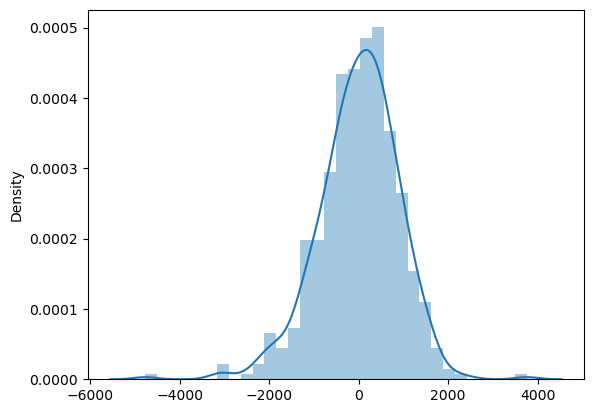

In [125]:
sns.distplot(res)

### Prediction and evaluation on test set

In [127]:
# Transformation on test set that we have done on train set (scaling)

In [128]:
# Create list of numerical variables
numvar1=['temp', 'atemp', 'hum', 'windspeed',"days_old"]

# 2. transform on data
X_test[numvar1]=scaler.transform(X_test[numvar1])
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.252747,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.734890,0,1,...,0,0,0,0,1,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.410714,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.303571,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.208791,0,1,...,0,0,1,0,0,0,0,0,1,0


In [129]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.490559,0.254545,0.263636,...,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.654545,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.294116,0.436599,0.441609,...,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.004121,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.234203,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.480082,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.740041,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.001374,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
# add a constant
X_test_sm=sm.add_constant(X_test[['yr', 'holiday', 'windspeed', 'spring', 'summer', 'winter', 'jan',
       'jul', 'oct', 'sept', 'mon', 'tue', 'bad', 'moderate']])
X_test_sm.head()

,const,yr,holiday,windspeed,spring,summer,winter,jan,jul,oct,sept,mon,tue,bad,moderate
184,1.0,0,1,0.084219,0,0,0,0,1,0,0,0,0,0,1
535,1.0,1,0,0.153728,0,1,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0.334206,0,0,1,0,0,1,0,0,0,0,1
221,1.0,0,0,0.339570,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.537414,0,1,0,0,0,0,0,0,0,0,0


In [131]:
# predict
y_test_pred=lr_model.predict(X_test_sm)

In [132]:
from sklearn.metrics import r2_score

In [133]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7678548356708178

# FEATURE SELECTION USING RFE

In [135]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X, y, train_size=0.7, random_state=100)

In [136]:
scaler= MinMaxScaler()
numvar2=['temp', 'atemp', 'hum', 'windspeed',"days_old"]
X2_train[numvar2]=scaler.fit_transform(X2_train[numvar2])
X2_train.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.152473,0,1,...,0,0,0,1,0,0,0,0,0,1


# Building our model

In [138]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [139]:
lm=LinearRegression()
lm.fit(X2_train,y2_train)
rfe = RFE(estimator=lm, n_features_to_select=14)
rfe=rfe.fit(X2_train, y2_train)

In [140]:
list(zip(X2_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('spring', False, 8),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', False, 15),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', False, 14),
 ('jun', False, 10),
 ('mar', False, 17),
 ('may', False, 9),
 ('nov', False, 16),
 ('oct', False, 3),
 ('sept', True, 1),
 ('mon', False, 12),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 18),
 ('tue', False, 11),
 ('wed', False, 13),
 ('bad', True, 1),
 ('good', True, 1),
 ('moderate', True, 1)]

In [141]:
col=X2_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old', 'summer',
       'winter', 'aug', 'jan', 'sept', 'bad', 'good', 'moderate'],
      dtype='object')

In [142]:
X2_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'spring', 'dec', 'feb', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [143]:
X_train_rfe=X2_train[col]


In [144]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [145]:
lm=sm.OLS(y2_train, X_train_rfe).fit()

In [146]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.2
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.66e-189
Time:                        23:34:30   Log-Likelihood:                -4115.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     496   BIC:                             8318.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1046.4535    219.643      4.764      0.000     614.908    1477.999
yr          2169.9377    247.448      8.769      0.000    1683.762    2656.113
holiday     -817.0343    222.159     -3.678      0.000   -1253.523    -380.545
temp        4531.8602    222.228     20.393      0.000    4095.237    4968.484
hum        -1478.7529    326.210     -4.533      0.000   -2119.677    -837.828
windspeed  -1651.4361    223.837     -7.378      0.000   -2091.222   -1211.650
days_old    -355.5274    480.801     -0.739      0.460   -1300.184     589.130
summer       836.9631     99.738      8.392      0.000     641.003    1032.923
winter      1275.1682    149.245      8.544      0.000     981.938    1568.399
aug          491.4539    146.186      3.362      0.001     204.234     778.674
jan         -365.1048    167.112     -2.185      0.029    -693.439     -36.770
sept        1069.4901    145.538      7.349      0.000     783.542    1355.438
bad         -872.9338    189.674     -4.602      0.000   -1245.598    -500.270
good        1191.1728     77.448     15.380      0.000    1039.006    1343.340
moderate     728.2145    100.368      7.255      0.000     531.017     925.412
==============================================================================
Omnibus:                       56.366   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.039
Skew:                          -0.616   Prob(JB):                     3.16e-27
Kurtosis:                       5.056   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [147]:
X_train_new=X_train_rfe.drop(['days_old'], axis=1)

In [148]:
X_train_lm=sm.add_constant(X_train_new)
lm=sm.OLS(y2_train, X_train_lm).fit()

In [149]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.44e-190
Time:                        23:34:30   Log-Likelihood:                -4115.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     497   BIC:                             8313.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1014.8955    215.359      4.713      0.000     591.770    1438.021
yr          1994.5460     70.468     28.304      0.000    1856.094    2132.998
holiday     -821.9129    221.960     -3.703      0.000   -1258.008    -385.818
temp        4488.9507    214.420     20.935      0.000    4067.670    4910.231
hum        -1492.9844    325.494     -4.587      0.000   -2132.498    -853.471
windspeed  -1642.2251    223.388     -7.351      0.000   -2081.127   -1203.323
summer       850.8773     97.902      8.691      0.000     658.525    1043.230
winter      1194.0497    101.145     11.805      0.000     995.325    1392.775
aug          464.7156    141.579      3.282      0.001     186.549     742.882
jan         -314.4839    152.377     -2.064      0.040    -613.866     -15.102
sept        1042.5295    140.833      7.403      0.000     765.828    1319.231
bad         -879.9348    189.351     -4.647      0.000   -1251.962    -507.907
good        1177.2971     75.106     15.675      0.000    1029.732    1324.862
moderate     717.5332     99.277      7.228      0.000     522.478     912.588
==============================================================================
Omnibus:                       57.708   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.010
Skew:                          -0.624   Prob(JB):                     2.63e-28
Kurtosis:                       5.102   Cond. No.                     1.07e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [150]:
vif=pd.DataFrame()
X2=X_train_new
vif['Features']=X2.columns
vif['VIF']=[variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
11,bad,inf
12,good,inf
13,moderate,inf
3,temp,1.94
4,hum,1.87
7,winter,1.58
9,jan,1.55
6,summer,1.48
8,aug,1.45
10,sept,1.22


In [151]:
X_train_new=X_train_new.drop(['bad'], axis=1)

In [152]:
X_train_lm=sm.add_constant(X_train_new)
lm=sm.OLS(y2_train, X_train_lm).fit()

In [153]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.4
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.44e-190
Time:                        23:34:30   Log-Likelihood:                -4115.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     497   BIC:                             8313.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        134.9608    376.494      0.358      0.720    -604.755     874.677
yr          1994.5460     70.468     28.304      0.000    1856.094    2132.998
holiday     -821.9129    221.960     -3.703      0.000   -1258.008    -385.818
temp        4488.9507    214.420     20.935      0.000    4067.670    4910.231
hum        -1492.9844    325.494     -4.587      0.000   -2132.498    -853.471
windspeed  -1642.2251    223.388     -7.351      0.000   -2081.127   -1203.323
summer       850.8773     97.902      8.691      0.000     658.525    1043.230
winter      1194.0497    101.145     11.805      0.000     995.325    1392.775
aug          464.7156    141.579      3.282      0.001     186.549     742.882
jan         -314.4839    152.377     -2.064      0.040    -613.866     -15.102
sept        1042.5295    140.833      7.403      0.000     765.828    1319.231
good        2057.2318    228.416      9.007      0.000    1608.451    2506.012
moderate    1597.4680    217.311      7.351      0.000    1170.506    2024.430
==============================================================================
Omnibus:                       57.708   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.010
Skew:                          -0.624   Prob(JB):                     2.63e-28
Kurtosis:                       5.102   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
vif=pd.DataFrame()
X2=X_train_new
vif['Features']=X2.columns
vif['VIF']=[variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,117.69
11,good,10.15
12,moderate,8.86
3,temp,1.94
4,hum,1.87
7,winter,1.58
9,jan,1.55
6,summer,1.48
8,aug,1.45
10,sept,1.22


In [155]:
X_train_new=X_train_new.drop(['good'], axis=1)

In [156]:
X_train_lm=sm.add_constant(X_train_new)
lm=sm.OLS(y2_train, X_train_lm).fit()

In [157]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     201.7
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          1.75e-175
Time:                        23:34:30   Log-Likelihood:                -4154.3
No. Observations:                 510   AIC:                             8333.
Df Residuals:                     498   BIC:                             8383.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2778.3003    254.079     10.935      0.000    2279.100    3277.500
yr          2001.9059     75.920     26.369      0.000    1852.743    2151.069
holiday     -729.2562    238.891     -3.053      0.002   -1198.616    -259.897
temp        4679.9755    229.891     20.357      0.000    4228.299    5131.652
hum        -2630.0491    323.245     -8.136      0.000   -3265.141   -1994.957
windspeed  -2021.8317    236.365     -8.554      0.000   -2486.227   -1557.436
summer       885.8071    105.400      8.404      0.000     678.723    1092.892
winter      1192.4977    108.978     10.943      0.000     978.385    1406.611
aug          490.9612    152.510      3.219      0.001     191.319     790.604
jan         -240.4124    163.938     -1.466      0.143    -562.507      81.682
sept        1027.4498    151.729      6.772      0.000     729.343    1325.557
moderate    -199.0322     92.917     -2.142      0.033    -381.590     -16.475
==============================================================================
Omnibus:                       96.726   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.037
Skew:                          -0.938   Prob(JB):                     6.86e-56
Kurtosis:                       5.904   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
vif=pd.DataFrame()
X2=X_train_new
vif['Features']=X2.columns
vif['VIF']=[variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,46.17
3,temp,1.92
4,hum,1.59
7,winter,1.58
9,jan,1.55
6,summer,1.48
8,aug,1.44
11,moderate,1.40
10,sept,1.22
5,windspeed,1.15


In [159]:
X_train_new=X_train_new.drop(['jan'], axis=1)

In [160]:
X_train_lm=sm.add_constant(X_train_new)
lm=sm.OLS(y2_train, X_train_lm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.1
Date:                Fri, 21 Feb 2025   Prob (F-statistic):          3.35e-176
Time:                        23:34:30   Log-Likelihood:                -4155.4
No. Observations:                 510   AIC:                             8333.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2656.0005    240.279     11.054      0.000    2183.916    3128.085
yr          1995.7876     75.893     26.298      0.000    1846.679    2144.896
holiday     -734.9547    239.135     -3.073      0.002   -1204.790    -265.119
temp        4832.9496    205.099     23.564      0.000    4429.986    5235.913
hum        -2657.9306    323.057     -8.227      0.000   -3292.651   -2023.211
windspeed  -1983.7634    235.206     -8.434      0.000   -2445.879   -1521.648
summer       926.8959    101.725      9.112      0.000     727.033    1126.758
winter      1257.6219     99.634     12.622      0.000    1061.868    1453.376
aug          503.2114    152.457      3.301      0.001     203.675     802.747
sept        1043.9822    151.483      6.892      0.000     746.358    1341.606
moderate    -201.0637     93.014     -2.162      0.031    -383.810     -18.317
==============================================================================
Omnibus:                       94.715   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.019
Skew:                          -0.923   Prob(JB):                     3.78e-54
Kurtosis:                       5.858   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
vif=pd.DataFrame()
X2=X_train_new
vif['Features']=X2.columns
vif['VIF']=[variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,41.20
4,hum,1.58
3,temp,1.53
8,aug,1.44
10,moderate,1.40
6,summer,1.37
7,winter,1.32
9,sept,1.21
5,windspeed,1.14
1,yr,1.03


#### Residual analysis

In [163]:
y2_train_pred=lm.predict(X_train_lm)

<Axes: ylabel='Density'>

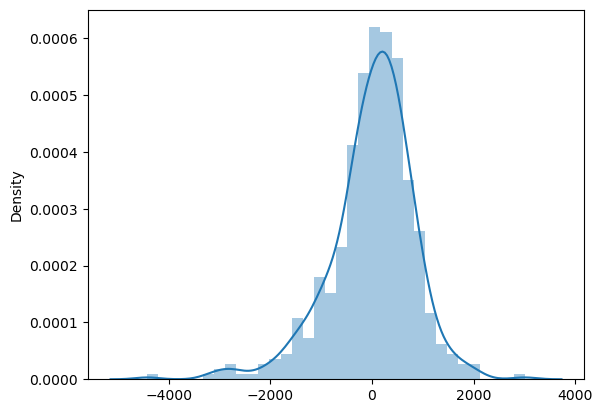

In [164]:
res=y2_train-y2_train_pred
sns.distplot(res)

In [165]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'aug', 'sept', 'moderate'],
      dtype='object')

In [166]:
# Create list of numerical variables
numvar1=['temp', 'atemp', 'hum', 'windspeed',"days_old"]

# 2. transform on data
X2_test[numvar1]=scaler.transform(X2_test[numvar1])
X2_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,bad,good,moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.252747,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.734890,0,1,...,0,0,0,0,1,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.410714,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.303571,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.208791,0,1,...,0,0,1,0,0,0,0,0,1,0


In [167]:
X_test_new=X2_test[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'aug', 'sept', 'moderate']]

In [408]:
X_test_new=sm.add_constant(X_test_new)

In [410]:
y2_pred=lm.predict(X_test_new)

<Axes: ylabel='cnt'>

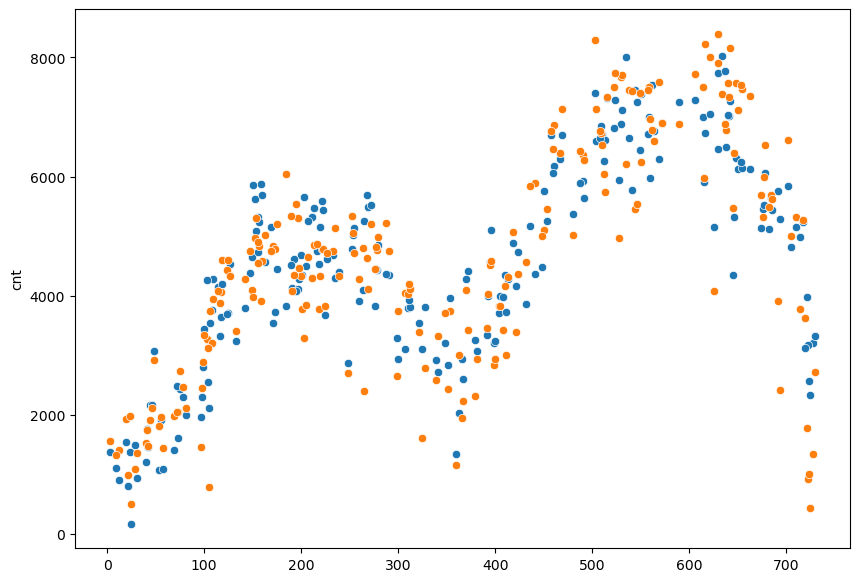

In [426]:
fig=plt.figure(figsize=(10,7))

sns.scatterplot(y2_pred)
sns.scatterplot(y2_test)

In [430]:
r2_score(y_true=y2_test, y_pred=y2_pred)

0.8033576707120287